In [ ]:
# install.packages("ggplot2")
# install.packages("ggpattern")

In [ ]:
# Load dataset
path <- "lung_mysarahmadbhat.csv"

df <- read.csv(path, stringsAsFactors = FALSE)

# Menampilkan 5 baris pertama
head(df)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
2,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
3,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
4,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
5,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
6,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES


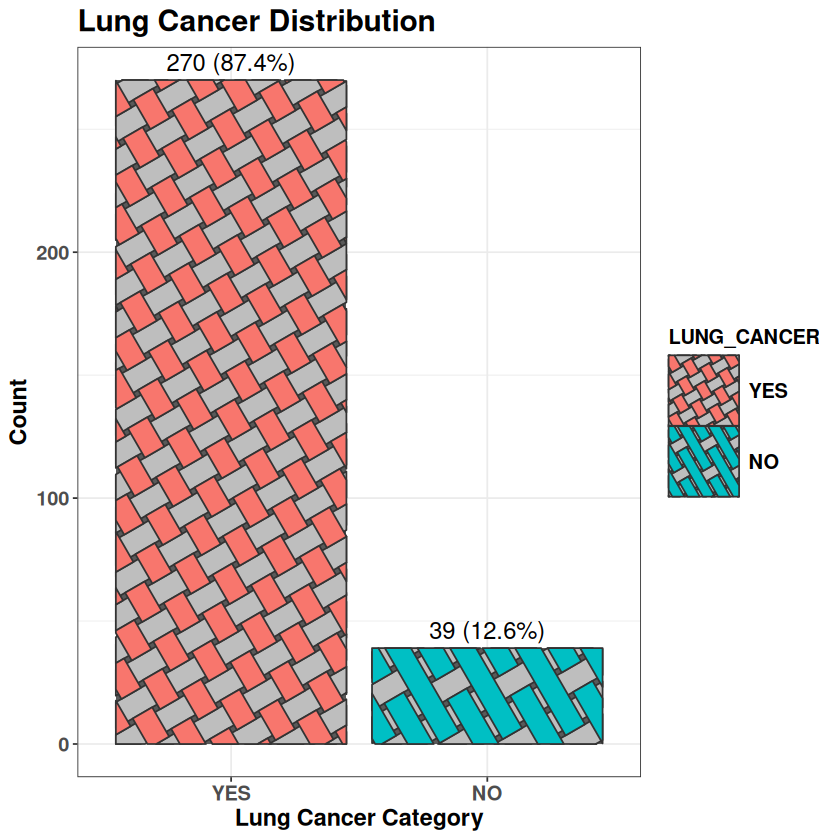

In [ ]:
library(ggplot2)
library(ggpattern)

# Menghitung jumlah kemunculan setiap kategori dalam LUNG_CANCER
tdf <- as.data.frame(table(df$LUNG_CANCER))
colnames(tdf) <- c("LUNG_CANCER", "count")  # Memberi nama kolom agar lebih mudah dipahami

# Menambahkan kolom persentase
total_count <- sum(tdf$count)
tdf$percentage <- (tdf$count / total_count) * 100

# Pastikan urutan "YES" di kiri dan "NO" di kanan
tdf$LUNG_CANCER <- factor(tdf$LUNG_CANCER, levels = c("YES", "NO"))

# Plot dengan perbaikan warna & bold label
ggplot(tdf, aes(x = LUNG_CANCER, y = count)) +
  geom_col_pattern(
    aes(pattern_fill2=LUNG_CANCER, pattern_type = LUNG_CANCER),
    pattern = 'weave',
    pattern_density = 0.8,
    pattern_fill = 'grey',
    pattern_key_scale_factor = 0.5
  ) +
  geom_text(aes(label = sprintf("%d (%.1f%%)", count, percentage)), vjust = -0.5, size = 5) +  # Bold label
  scale_pattern_type_manual(values = c("plain", "satin")) +  
  labs(title = "Lung Cancer Distribution",
       x = "Lung Cancer Category",
       y = "Count",
       fill = "Lung Cancer") +
  theme_bw() +
  theme(
    legend.key.size = unit(1.5, 'cm'),
    text            = element_text(face = "bold"),  # Semua teks menjadi bold
    axis.title      = element_text(size = 14),  # Ukuran lebih besar untuk label sumbu
    axis.text       = element_text(size = 12),  
    legend.text     = element_text(size = 12),
    legend.title    = element_text(size = 12),
    plot.title = element_text(size = 18),
  )

In [ ]:
ggsave("plot_distribusi.png", width = 10, height = 8, dpi = 300)  # Ubah ukuran width & height sesuai kebutuhan